# ***IMPORTS n PARAMETERS***

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# x = [1,2,3,4]
# y = [6,7,8,-9]
# plt.step(x,y)
# plt.show

pos = 'pos' 
neg = 'neg'

inn = 'inn'
out = 'out'

# ***NEW CODE***

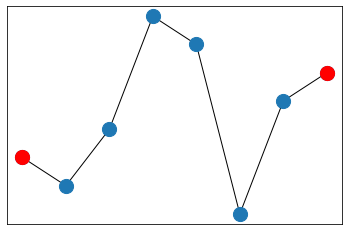

[5, 1, 0, 2, 6, 7, 4, 3]


In [ ]:
#Converts a string to a list
#Strings must be of form "a b b a'"
#Where a' denotes a inverse
def stringToEdges(word):
  edges = []
  stringList = word.split()
  return stringList

#vertexDecoder will create a new vertexList
#where the vertices are stored as tuples of their links
def vertexDecoder(vertexList):
  newVertexList = []
  for vertex in vertexList:
    if (vertex == 'e'):
      newVertexList.append(vertex)
    else:
      if len(vertex[1]) == 1:
        rightBit = vertex[1]+"'"
      if len(vertex[1]) == 2:
        rightBit = vertex[1][0]
      toople = (vertex[0], rightBit)
      newVertexList.append(toople)
  return newVertexList


def wordGraph(word, iterations):
  #This makes a super word that is x many 
  #versions of the orginal word
  string = ""
  for i in range(0, iterations):
    string = string + word + ' '
  edgeList = stringToEdges(string)
  vertexList = []
  #For any exterior vertex, we store one side of its tuple as 'end'
  #for any other vertex, we label it as a tuple of adjacent edges
  for i in range(0, (len(edgeList)+1)):
    if i == 0:
      vertexList.append('e')
    if (0 < i < len(edgeList)):
      toople = (edgeList[i-1], edgeList[i])
      vertexList.append(toople)  
    if i == len(edgeList):
      vertexList.append('e')
  #We then change how we store vertices
  #We instead store them as tuples were the elements
  #of the tuple are edges in their link
  newVertexList = vertexDecoder(vertexList)
  wordGraph = (edgeList, newVertexList)
  return(wordGraph)

#This will take in a tuple of lists
#the first list is the edgeList
#The second list is the vertexList
def buildGraph(wordGraph):
  G = nx.Graph()
  for i in range(0, (len(wordGraph[1]))):
    G.add_node(i, label=wordGraph[1][i])
  for i in range(0, (len(wordGraph[1])-1)):
    G.add_edge(i, i+1, label=wordGraph[0][i])
  return G

#This takes in an nx graph that is a line
#and a start and end vertex.
#it will output a subgraph accordingly!
def getSubgraph(G,startVertex,endVertex):
  subNodeList = []
  vertexList = list(G.nodes())
  for vertex in vertexList:
    if vertexList.index(startVertex) <= vertexList.index(vertex) <= vertexList.index(endVertex):
      subNodeList.append(vertex)
  H = G.subgraph(subNodeList)
  return H

def getPrognosis(edgeList, vertexList, localOrder):
  #Counter will be the DSO rise index
  counter = 0
  #We first consider edges (edge rise index)
  for item in edgeList:
    if len(item[2]) == 1:
      counter += 1
    else:
      counter -= 1
  #Then we consider INTERIOR vertices (vertex rise index)
  for i in range(0, (len(vertexList))):
    vertex = vertexList[i]
    #print(vertex)
    if (vertex[1] != 'e'):
      #print(vertex)
      if localOrder.index(vertex[1][0]) < localOrder.index(vertex[1][1]):
        counter += 1
      else:
        counter -= 1
  return counter


def DSO(word, iterations, localOrder):
  wordLength = len(wordGraph(word, 1)[1]) - 1
  G = buildGraph(wordGraph(word, iterations))
  vertexList = list(G.nodes())
  vertexOrder = []
  #For a vertex x in our graph, we will look at every vertex behind it
  #We then generate a subgraph for every vertex behind x
  #And assess whether a vertex is higher or lower than x
  #This process determines the height of x!
  for node_x in vertexList:
    x_index = 0
    if vertexList.index(node_x) == 0:
        vertexOrder.append(node_x)
    else:
      for node_y in vertexList:
        if vertexList.index(node_y) < vertexList.index(node_x):
          J = getSubgraph(G, node_y, node_x)
          edgeList = J.edges.data('label')
          nodeList = list(J.nodes.data('label'))
          #print(nodeList)
          x = getPrognosis(edgeList, nodeList, localOrder)
          if x > 0:
            x_index += 1
      if x_index < len(vertexOrder):
        vertexOrder.insert(x_index, node_x)
      else:
        vertexOrder.append(node_x)
  pos = nx.spring_layout(G, scale=2, seed=80)
  vertexList = list(G.nodes())
  transitional_vertices = []

  for vertex in vertexList:
    if vertexList.index(vertex) % wordLength==0 :
      transitional_vertices.append(vertex)
    pos[vertex] = (vertex, vertexOrder.index(vertex))
  nx.draw_networkx_nodes(G, pos, node_size=200)
  nx.draw_networkx_nodes(G, pos, nodelist=transitional_vertices, node_color='r', node_size=200)
  nx.draw_networkx_edges(G, pos)
  plt.show()
  return vertexOrder
        
#JUST BE SURE THAT 'ORDER' HAS ALL NECESSARY HALF EDGES
word = "a b a c' c' a a"
order = ["b'", "a", "b", "a'", 'c', "c'"]
print(DSO(word, 1, order))


a b a' b'


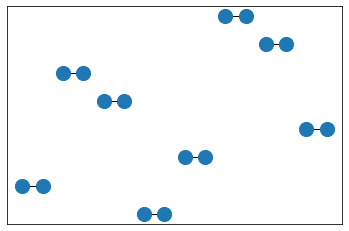

[6, 0, 8, 14, 4, 2, 12, 10]


In [ ]:
#Start of edgeDSO
#We define a new graph which
#adds barycenter nodes for each edge
#removes any vertices of valence 1
#has edge orientations natural to DSO local orders
def buildEdgeDual(word, iterations):
  #We first iterate our word and parse all 
  #the edges to a list
  string = ""
  for i in range(0, iterations):
    string = string + word + ' '
  edgeList = stringToEdges(string)

  #We then make a list for all import vertices
  #that existed in the orignal graph
  #(any non-exterior vertex in original graph)
  nodeVertices = []
  for i in range(0, len(edgeList)-1):
    vertex = (edgeList[i], edgeList[i+1])
    nodeVertices.append(vertex)

  #We then decode the vertices so that each vertex is
  #stored as a tuple of vertices in its link
  newNodeVertices = vertexDecoder(nodeVertices)
  G = nx.Graph()


  #We then build the barycenter vertices
  #one barycenter vertex for each edge
  barycenterLabels = []
  for i in range(0, len(edgeList)):
    if i == 0:
      barycenterLabel = ('e')
      barycenterLabels.append(barycenterLabel)
    if i == (len(edgeList) - 1):
      barycenterLabel = ('e')
      barycenterLabels.append(barycenterLabel)
    if (0 < i < len(edgeList)-1):
      barycenterLabel = (edgeList[i], edgeList[i])
      barycenterLabels.append(barycenterLabel)

  #We then decode the vertices again so that they
  #are stored as tuples of their links
  barycenterLabels = vertexDecoder(barycenterLabels)


  #A bad way to start adding these vertices to the graph
  counter = 0
  for i in range(0, len(edgeList)):
    G.add_node(counter, type='barycenter', label=barycenterLabels[i])
    counter += 1
    if i < (len(edgeList) - 1):
      G.add_node(counter, type='nonbarycenter', label=nodeVertices[i])
      counter += 1

  for i in range(0, len(list(G.nodes.data('label')))-1):
    node = list(G.nodes.data('label'))[i+1]
    G.add_edge(i, i+1, label=node[1][0])

  return G, edgeList


def edgeDSO(word, iterations, localOrder):
  G, edgeLabels = buildEdgeDual(word, iterations)
  
  barycenterVertices = []
  for item in G.nodes.data('type', 'label'):
    if item[1] == 'barycenter':
      barycenterVertices.append(item[0])

  #vertexList = list(G.nodes())
  vertexList = barycenterVertices
  vertexOrder = []

  #For a vertex x in our graph, we will look at every vertex behind it
  #We then generate a subgraph for every vertex behind x
  #And assess whether a vertex is higher or lower than x
  #This process determines the height of x!
  for node_x in vertexList:
    x_index = 0
    if vertexList.index(node_x) == 0:
        vertexOrder.append(node_x)
    else:
      for node_y in vertexList:
        if vertexList.index(node_y) < vertexList.index(node_x):
          J = getSubgraph(G, node_y, node_x)
          edgeList = J.edges.data('label')
          nodeList = list(J.nodes.data('label'))
          x = getPrognosis(edgeList, nodeList, localOrder)
          
          if x > 0:
            x_index += 1

      if x_index < len(vertexOrder):
        vertexOrder.insert(x_index, node_x)
      else:
        vertexOrder.append(node_x)


  #vertexList = list(G.nodes())

  J = nx.Graph()

  copyList = []
  counter = 0
  for vertex in vertexList:
    J.add_node(vertex)
    vertexCopy = str(vertex) + '_copy'
    copyList.append(vertexCopy)
    J.add_node(vertexCopy)
    J.add_edge(vertex, vertexCopy, label=edgeLabels[counter])
    counter += 1

  pos = nx.spring_layout(J, scale=1, seed=80)
  #print(J.edges())

  positionList = []
  for vertex in vertexList:
    toople = (vertex, vertexOrder.index(vertex))
    positionList.append(toople)
    pos[vertex] = toople

  for i in range(0, len(copyList)):
    toople = positionList[i]
    newToople = (toople[0]+1, toople[1])
    pos[copyList[i]] = newToople


  nx.draw_networkx_nodes(vertexList, pos, node_size=200)
  nx.draw_networkx_nodes(copyList, pos, node_size=200)
  nx.draw_networkx_edges(J, pos)
  plt.show()

  return vertexOrder

word = "a b a' b'"
order = ["b'", "a", "b", "a'", 'c', "c'"]
print(word)
print(edgeDSO(word, 2, order))

In [ ]:
G = nx.path_graph(3)
pos = nx.spring_layout(J, scale=2, seed=80)

